# Business Understanding 

I want to make a competitive team in Cartola. My goal is to spend a little money (cards) and earn a higher score.

For this, is necessary answer some questions, like:

What is the best players per position?

1.   What is the best players per position?
2.   What is the highest average team?
3.   What is the highest expected value team?
4.   What is the best team with 100 cartoletas?
5.   What is the best position to invest?






# Data Understanding

In [2]:
import pandas as pd

cartolaDataframe = pd.read_csv("/content/jogadores.csv")

cartolaDataframe = cartolaDataframe[(cartolaDataframe["ano"] == 2019)]

cartolaDataframe.rename(columns={"Nome": "Name"}, inplace=True)

In [3]:
print(cartolaDataframe.shape)

print(cartolaDataframe.describe())

print(cartolaDataframe.isna().sum())

(8522, 29)
             Preço            J        Média  ...     ano           RB           PE
count  8522.000000  8522.000000  8522.000000  ...  8522.0  6830.000000  7530.000000
mean      7.706467    12.515959     3.274962  ...  2019.0    15.193997    22.650066
std       3.978725     8.507218     2.018664  ...     0.0    13.767498    19.194452
min       0.690000     0.000000    -6.000000  ...  2019.0     1.000000     1.000000
25%       4.640000     5.000000     2.040000  ...  2019.0     5.000000     8.000000
50%       7.020000    11.000000     3.140000  ...  2019.0    11.000000    17.000000
75%      10.190000    19.000000     4.360000  ...  2019.0    21.000000    33.000000
max      24.420000    38.000000    22.700000  ...  2019.0    94.000000   123.000000

[8 rows x 27 columns]
Name             0
Clube            0
Preço            0
J                0
Média            0
Últ. Pont.       0
Variação         0
DS            8522
G             5045
A             5522
SG            5546
F

In [4]:
cartolaDataframe.describe()

,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE
count,8522.000000,8522.000000,8522.000000,8522.000000,8522.000000,0.0,3477.000000,3000.000000,2976.000000,7242.000000,5947.000000,5375.000000,1475.000000,704.000000,242.000000,187.000000,630.000000,5489.000000,276.000000,709.000000,6922.000000,3094.000000,0.0,8522.000000,8522.0,6830.000000,7530.000000
mean,7.706467,12.515959,3.274962,3.091522,0.071155,NaN,2.549612,1.828000,4.651210,13.704087,6.648562,4.826605,1.324068,23.421875,1.429752,1.101604,1.087302,2.762070,1.083333,15.365303,14.677116,2.921461,NaN,19.603849,2019.0,15.193997,22.650066
std,3.978725,8.507218,2.018664,4.087329,1.108690,NaN,2.568212,1.272906,3.168859,14.110259,6.411333,4.664286,0.550746,17.266784,0.580834,0.302938,0.282501,1.962442,0.276887,10.931760,12.400701,2.966344,NaN,10.949536,0.0,13.767498,19.194452
min,0.690000,0.000000,-6.000000,-9.000000,-7.380000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,2019.0,1.000000,1.000000
25%,4.640000,5.000000,2.040000,0.000000,-0.450000,NaN,1.000000,1.000000,2.000000,4.000000,2.000000,2.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,1.000000,NaN,10.000000,2019.0,5.000000,8.000000
50%,7.020000,11.000000,3.140000,2.100000,0.000000,NaN,2.000000,1.000000,4.000000,9.000000,5.000000,3.000000,1.000000,21.000000,1.000000,1.000000,1.000000,2.000000,1.000000,14.000000,11.000000,2.000000,NaN,20.000000,2019.0,11.000000,17.000000
75%,10.190000,19.000000,4.360000,5.000000,0.520000,NaN,3.000000,2.000000,7.000000,19.000000,9.000000,6.000000,2.000000,34.000000,2.000000,1.000000,1.000000,4.000000,1.000000,22.000000,21.000000,4.000000,NaN,29.000000,2019.0,21.000000,33.000000
max,24.420000,38.000000,22.700000,37.700000,14.520000,NaN,25.000000,13.000000,15.000000,147.000000,49.000000,38.000000,4.000000,95.000000,4.000000,2.000000,2.000000,12.000000,2.000000,57.000000,116.000000,21.000000,NaN,38.000000,2019.0,94.000000,123.000000


# Data Preparation

**Why I fill NaN values with 0?**

It is filled with 0 because if a player does not score a goal the correct value is 0 not NaN

In [5]:
#because they are punctual numbers, for example, games without conceding a goal instead of being NaN becomes 0

cartolaDataframe = cartolaDataframe.fillna(0)
cartolaDataframe.isna().sum()

Name          0
Clube         0
Preço         0
J             0
Média         0
Últ. Pont.    0
Variação      0
DS            0
G             0
A             0
SG            0
FS            0
FF            0
FD            0
FT            0
DD            0
DP            0
GC            0
CV            0
CA            0
PP            0
GS            0
FC            0
I             0
PI            0
rodada        0
ano           0
RB            0
PE            0
dtype: int64

In [6]:
# adicionar uma coluna para as posições

playersPosition = []

splitedNames = cartolaDataframe["Name"].str.split(" ")

for splitedName in splitedNames:
  for namePosition in splitedName:
    if "(" in namePosition:
      namePosition = namePosition.replace("(", "")
      namePosition = namePosition.replace(")", "")
      playersPosition.append(namePosition)

cartolaDataframe["posicao"] = playersPosition
cartolaDataframe

,Name,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE,posicao
3774,Ricardo Bueno (ATA),Ceará,18.52,1,22.70,22.7,14.52,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1,2019,1.0,1.0,ATA
3775,Bruno Henrique (ATA),Flamengo,21.51,1,21.00,21.0,11.51,0.0,2.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,0.0,0.0,ATA
3776,Nikão (MEI),Athlético-PR,19.29,1,18.80,18.8,10.29,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,5.0,0.0,MEI
3777,Tiepo (GOL),Chapecoense,13.18,1,17.00,17.0,11.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,0.0,GOL
3778,Vanderlei (GOL),Santos,22.69,1,15.70,15.7,5.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2019,0.0,1.0,GOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,Lucas Hernández (LAT),Atlético-MG,1.70,5,-0.34,0.8,-0.27,0.0,0.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,38,2019,4.0,14.0,LAT
12292,Luccas Claro (ZAG),Fluminense,2.29,2,-0.40,0.4,0.15,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,38,2019,2.0,6.0,ZAG
12293,Helinho (ATA),São Paulo,2.28,8,-0.42,-1.7,-0.32,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,0.0,38,2019,3.0,10.0,ATA
12294,Wesley (MEI),Avaí,1.69,10,-0.51,2.9,0.41,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,1.0,0.0,38,2019,7.0,15.0,MEI


# What is the best players per position?



In [7]:
#players with the highest average per position

playerAndPosition = {}
dictlist = []
for nome in cartolaDataframe["Name"].unique():
  lastMatchOfPlayer = cartolaDataframe[(cartolaDataframe["Name"]==nome)].tail(1)
  lastMean = lastMatchOfPlayer["Média"].tolist()[0]
  position = lastMatchOfPlayer["posicao"].tolist()[0]

  if position not in playerAndPosition:
    playerAndPosition[position] = {"name": nome, "mean": lastMean}

  if lastMean > playerAndPosition[position]["mean"]:
    data = {"name": nome, "mean": lastMean, "position": position}
    playerAndPosition[position] = data
  
playerAndPosition

for key, value in playerAndPosition.items():
    dictlist.append(value)
dictlist

[{'mean': 10.73, 'name': 'Rodrygo (ATA)', 'position': 'ATA'},
 {'mean': 10.84, 'name': 'Arrascaeta (MEI)', 'position': 'MEI'},
 {'mean': 10.0, 'name': 'Alexander (GOL)', 'position': 'GOL'},
 {'mean': 8.4, 'name': 'Abner Felipe (LAT)', 'position': 'LAT'},
 {'mean': 10.0, 'name': 'Rodrigues (ZAG)', 'position': 'ZAG'},
 {'mean': 6.4, 'name': 'Andrey Lopes (TEC)', 'position': 'TEC'}]

Text(0.5, 0, 'Position')

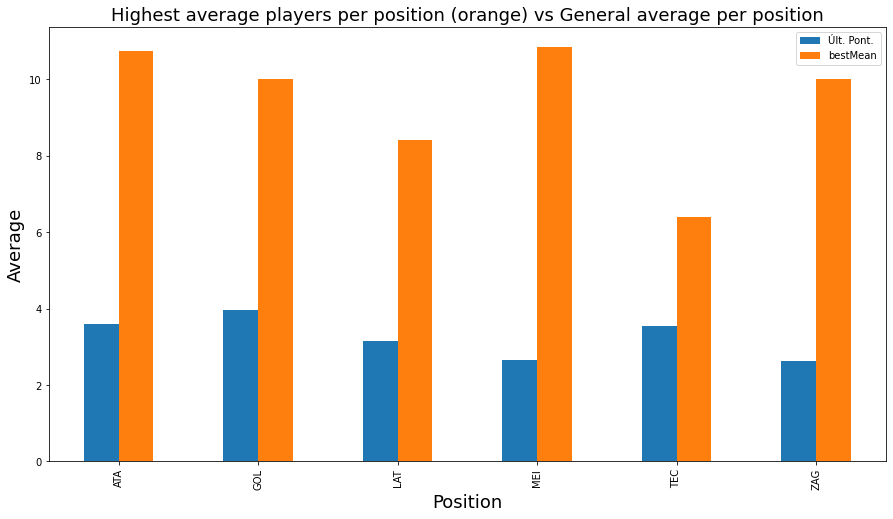

In [38]:
# Comparing the best average per position with general average per position
cartolaDataframeGroupedByPosition = cartolaDataframe.groupby(by="posicao").mean().sort_values(by="posicao")

dfPlayerAndPosition = pd.DataFrame(dictlist,
                  columns=['name', 'mean', 'position']).sort_values(by="position")

cartolaDataframeGroupedByPosition["bestMean"] = dfPlayerAndPosition["mean"].to_list()

ax = cartolaDataframeGroupedByPosition.reset_index().plot(x="posicao", y=["Últ. Pont.", "bestMean"], kind="bar", figsize=(15,8))

ax.set_title("Highest average players per position (orange) vs General average per position", fontdict={'fontsize':18})
ax.set_ylabel('Average', fontdict={'fontsize':18})
ax.set_xlabel('Position', fontdict={'fontsize':18})

In [10]:
cartolaDataframe

,Name,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,FS,FF,FD,FT,DD,DP,GC,CV,CA,PP,GS,FC,I,PI,rodada,ano,RB,PE,posicao
3774,Ricardo Bueno (ATA),Ceará,18.52,1,22.70,22.7,14.52,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,1,2019,1.0,1.0,ATA
3775,Bruno Henrique (ATA),Flamengo,21.51,1,21.00,21.0,11.51,0.0,2.0,0.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,0.0,0.0,ATA
3776,Nikão (MEI),Athlético-PR,19.29,1,18.80,18.8,10.29,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,2019,5.0,0.0,MEI
3777,Tiepo (GOL),Chapecoense,13.18,1,17.00,17.0,11.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2019,0.0,0.0,GOL
3778,Vanderlei (GOL),Santos,22.69,1,15.70,15.7,5.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,2019,0.0,1.0,GOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12291,Lucas Hernández (LAT),Atlético-MG,1.70,5,-0.34,0.8,-0.27,0.0,0.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,10.0,0.0,0.0,38,2019,4.0,14.0,LAT
12292,Luccas Claro (ZAG),Fluminense,2.29,2,-0.40,0.4,0.15,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,38,2019,2.0,6.0,ZAG
12293,Helinho (ATA),São Paulo,2.28,8,-0.42,-1.7,-0.32,0.0,0.0,0.0,0.0,8.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10.0,1.0,0.0,38,2019,3.0,10.0,ATA
12294,Wesley (MEI),Avaí,1.69,10,-0.51,2.9,0.41,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,11.0,1.0,0.0,38,2019,7.0,15.0,MEI


In [11]:
#The team with the highest average 


highestAverageOfTeam = 0
teamNameWithHighestAverage = ""
for clubName in cartolaDataframe["Clube"].unique():
  mean = cartolaDataframe[(cartolaDataframe["Clube"] == clubName)]["Últ. Pont."].mean()
  if mean > highestAverageOfTeam:
    highestAverageOfTeam = mean
    teamNameWithHighestAverage = clubName
    

teamNameWithHighestAverage
print("club: ", teamNameWithHighestAverage, " highest average: ", highestAverageOfTeam)

club:  Santos  highest average:  4.206107055961076


In [12]:
# add profit for players
cartolaDataframe.head()


cartolaDataframe["Lucro"] = cartolaDataframe["Últ. Pont."]/cartolaDataframe["Preço"]

dicitonaryList = []
#adicionar valor esperado (expected value)
for nome in cartolaDataframe["Name"].unique():
  totalGames = cartolaDataframe[(cartolaDataframe["Name"] == nome)].shape[0]
  if totalGames > 20:
    totaThatPlayerCanGain = cartolaDataframe[(cartolaDataframe["Lucro"] >= 0) & (cartolaDataframe["Name"] == nome)]["Lucro"].mean()
    totaThatPlayerCanLost = cartolaDataframe[(cartolaDataframe["Lucro"] <= 0) & (cartolaDataframe["Name"] == nome)]["Lucro"].mean()

    probabilityOfWin = len(cartolaDataframe[(cartolaDataframe["Lucro"] >= 0) & (cartolaDataframe["Name"] == nome)])/totalGames
    probabilityOfLose = len(cartolaDataframe[(cartolaDataframe["Lucro"] <= 0) & (cartolaDataframe["Name"] == nome)])/totalGames
    probabilityOfDraw = len(cartolaDataframe[(cartolaDataframe["Lucro"] == 0) & (cartolaDataframe["Name"] == nome)])/totalGames

    if probabilityOfDraw > 0:
      probabilityOfWin = probabilityOfWin - probabilityOfDraw
      probabilityOfLose = probabilityOfLose + probabilityOfDraw

    if pd.isnull(totaThatPlayerCanGain) or totaThatPlayerCanGain == 0:
      totaThatPlayerCanGain = 0
      probabilityOfWin = 0

    if pd.isnull(totaThatPlayerCanLost) or totaThatPlayerCanLost == 0:
      totaThatPlayerCanLost = 0

    ev = (totaThatPlayerCanGain * probabilityOfWin) - (totaThatPlayerCanLost * probabilityOfLose)
    position = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["posicao"].to_list()[0]
    club = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["Clube"].to_list()[0]
    price = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["Preço"].mean()
    score = cartolaDataframe[(cartolaDataframe["Name"] == nome)]["Últ. Pont."].mean()
    data = {"Name": nome, "EV": ev, "Position": position, "Club": club, "Price": price, "Score": score, "ProbabilityOfWin": probabilityOfWin}
    dicitonaryList.append(data)


In [14]:
def generateTeam4_4_2(df, columnNameToSort):
  """
  Description: This function can be used to generate a team with a famous tactic called 4-4-2

  Arguments:
      df: dataframe. 
      columnNameToSort: A column to sort, for example, I want to generate a team based in price then I pass "price" to sort. 

  Returns:
      return a team with tatic 4-4-2
  """
  attacker = df[(df["Position"] == "ATA")].sort_values(by=columnNameToSort).tail(2)
  defenser = df[(df["Position"] == "ZAG")].sort_values(by=columnNameToSort).tail(2)
  lateral = df[(df["Position"] == "LAT")].sort_values(by=columnNameToSort).tail(2)
  mid = df[(df["Position"] == "MEI")].sort_values(by=columnNameToSort).tail(4)
  manager = df[(df["Position"] == "TEC")].sort_values(by=columnNameToSort).tail(1)
  goalkeeper = df[(df["Position"] == "GOL")].sort_values(by=columnNameToSort).tail(1)

  return attacker, defenser, lateral, mid, manager, goalkeeper

# What is the highest average team?

In [15]:
df = pd.DataFrame(dicitonaryList,
                  columns=['Name', 'EV', 'Position', "Club", "Price", "Score", "ProbabilityOfWin"])


print(df.shape)

#tatic: 4-4-2
#the best team with EV
attacker, defenser, lateral, mid, manager, goalkeeper = generateTeam4_4_2(df, "EV")

print("MELHORES ATACANTES: ", attacker)
print("MELHORES ZAGUEIROS: ", defenser)
print("MELHORES LATERAIS: ", lateral)
print("MELHORES MEIAS: ", mid)
print("MELHOR GOLEIRO: ", manager)
print("MELHOR TECNICO: ", goalkeeper)

(170, 7)
MELHORES ATACANTES:                      Name        EV  ...     Score ProbabilityOfWin
122      Romarinho (ATA)  0.625967  ...  3.469231         0.961538
137  Caio Paulista (ATA)  0.668194  ...  2.691304         0.913043

[2 rows x 7 columns]
MELHORES ZAGUEIROS:                   Name        EV Position  ...     Price     Score  ProbabilityOfWin
164  Alan Costa (ZAG)  0.682429      ZAG  ...  4.404583  2.358333          0.541667
104        Nino (ZAG)  0.796677      ZAG  ...  3.812571  3.374286          0.771429

[2 rows x 7 columns]
MELHORES LATERAIS:               Name        EV Position  ...     Price     Score  ProbabilityOfWin
95    Apodi (LAT)  0.591115      LAT  ...  5.123333  2.686667          0.633333
140  Patric (LAT)  0.744716      LAT  ...  4.096818  2.231818          0.590909

[2 rows x 7 columns]
MELHORES MEIAS:                       Name        EV  ...     Score ProbabilityOfWin
167  Richard Franco (MEI)  0.610653  ...  2.965385         0.807692
154          Fláv

In [16]:
#get dataframe with the players with the highest expected value
import numpy as np

playersWithHighestEV = pd.concat([attacker, defenser, lateral, mid, manager, goalkeeper])

rowsWithPlayers = np.isin(cartolaDataframe, playersWithHighestEV["Name"].to_list())

cartolaDataframePlayersWithHighestEV = cartolaDataframe[rowsWithPlayers]


In [17]:
playersWithHighestEV

,Name,EV,Position,Club,Price,Score,ProbabilityOfWin
122,Romarinho (ATA),0.625967,ATA,Fortaleza,5.372308,3.469231,0.961538
137,Caio Paulista (ATA),0.668194,ATA,Avaí,3.806087,2.691304,0.913043
164,Alan Costa (ZAG),0.682429,ZAG,CSA,4.404583,2.358333,0.541667
104,Nino (ZAG),0.796677,ZAG,Fluminense,3.812571,3.374286,0.771429
95,Apodi (LAT),0.591115,LAT,CSA,5.123333,2.686667,0.633333
140,Patric (LAT),0.744716,LAT,Atlético-MG,4.096818,2.231818,0.590909
167,Richard Franco (MEI),0.610653,MEI,Avaí,5.218846,2.965385,0.807692
154,Flávio (MEI),0.713973,MEI,Bahia,3.217200,1.952000,0.680000
76,Allan (MEI),0.743108,MEI,Fluminense,2.020000,1.192593,0.518519
100,Wellington (MEI),1.873578,MEI,Athlético-PR,0.963571,-0.275000,0.250000


In [18]:
def getColumnDataBasedOnThePlayerName(playerName, dfToGetData, columnToGetData):
  """
  Description: This function can be used to obtain data for a specific column using a player name to filter

  Arguments:
      playerName: player name. 
      dfToGetData: dataframe to get data from column.
      columnToGetData: column with user get the data

  Returns:
       A filter column with player name and specific data
  """
  columnData = dfToGetData[(dfToGetData["Name"] == playerName)][columnToGetData]
  columnData = columnData.replace(0, columnData.mean()).to_list()
  return columnData

In [19]:
def generateDataFromColumnPerRound(columnToGetRoundData, dataframe):
  """
  Description: This function can be used to generate a data from a dataframe. 
  For example: The user wants to get a data per round from "Price" so he pass
  price as parameter and the dataframe that he wants to extract the data

  Arguments:
      columnToGetRoundData: column to get data per round. 
      dataframe: dataframe to extract the data per round.

  Returns:
       A extracted data
  """
  data = {}
  for player in dataframe["Name"].unique():
    data[player] = getColumnDataBasedOnThePlayerName(player, dataframe, columnToGetRoundData)

  # preencher os NaN com a media
  dfPerRound = pd.DataFrame.from_dict(data,  orient='index').T

  fillMean = lambda col: col.fillna(col.mean())

  return dfPerRound.apply(fillMean, axis=0)

In [20]:
scorePerRoundOfTimeEV = generateDataFromColumnPerRound("Últ. Pont.", cartolaDataframePlayersWithHighestEV).sum(axis=1)
print(scorePerRoundOfTimeEV.mean())

31.115886491907343


In [21]:
dataList = []
#filter the players with 20 matches or more
for name in cartolaDataframe["Name"].unique():
  totalGames = cartolaDataframe[(cartolaDataframe["Name"] == name)].shape[0]
  if totalGames > 20:
    mean = cartolaDataframe[(cartolaDataframe["Name"] == name)]["Últ. Pont."].mean()
    position = cartolaDataframe[(cartolaDataframe["Name"] == name)]["posicao"].to_list()[0]
    data = {"Name": name, "Mean": mean, "Position": position}
    dataList.append(data)



# What is the highest expected value team?

In [22]:
# Generate the team with the players with the highest average
dataFrameHighestAverage = pd.DataFrame(dataList,
                  columns=['Name', 'Mean', 'Position'])

attackerHighestAverage, defenserHighestAverage, lateralHighestAverage, midHighestAverage, managerHighestAverage, goalkeeperHighestAverage = generateTeam4_4_2(dataFrameHighestAverage, "Mean")

playersWithHighestAverage = pd.concat([attackerHighestAverage, defenserHighestAverage, lateralHighestAverage, midHighestAverage, managerHighestAverage, goalkeeperHighestAverage])

rowsWithPlayers = np.isin(cartolaDataframe, playersWithHighestAverage["Name"].to_list())

cartolaDataframeplayersWithHighestAverage  = cartolaDataframe[rowsWithPlayers]

pontuacaoPorRodadaParaCadaJogadorComMediaAlta = {}

scorePerRoundTeamHighestAverage = generateDataFromColumnPerRound("Últ. Pont.", cartolaDataframeplayersWithHighestAverage).sum(axis=1)

print(scorePerRoundTeamHighestAverage.mean())

82.10831839758166


In [23]:
playersWithHighestAverage

,Name,Mean,Position
10,Everton (ATA),7.965217,ATA
6,Gabriel (ATA),8.615385,ATA
86,Víctor Cuesta (ZAG),4.580000,ZAG
82,Dedé (ZAG),4.600000,ZAG
71,Victor Ferraz (LAT),5.452381,LAT
115,Jorge (LAT),6.368966,LAT
66,Léo Sena (MEI),4.931034,MEI
135,Thiago Galhardo (MEI),5.148387,MEI
116,Carlos Sánchez (MEI),6.270968,MEI
72,Arrascaeta (MEI),7.954545,MEI


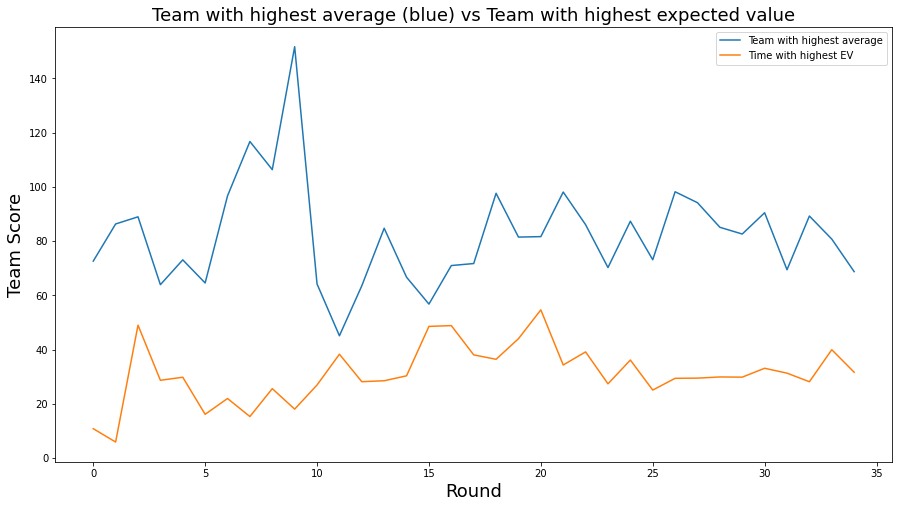

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
#We removed 1 because the EV team played 1 round less
x = list(range(0, len(scorePerRoundTeamHighestAverage) - 1))

xev = list(range(0, len(scorePerRoundOfTimeEV)))
plt.plot(x, scorePerRoundTeamHighestAverage.head(35), label="Team with highest average")
plt.plot(xev, scorePerRoundOfTimeEV, label="Time with highest EV")
plt.title("Team with highest average (blue) vs Team with highest expected value", fontsize=18)
plt.xlabel("Round", fontsize=18)
plt.ylabel("Team Score", fontsize=18)
plt.legend()

In [ ]:
scorePerRoundTeamHighestAverage.shape

(36,)

In [ ]:
# generate price per round TEAM HIGHEST AVERAGE
pricePerRoundTeamHighestAverage = generateDataFromColumnPerRound("Preço", cartolaDataframeplayersWithHighestAverage).sum(axis=1)

pricePerRoundTeamHighestAverage

0     140.550000
1     146.050000
2     151.940000
3     150.250000
4     151.690000
5     156.680000
6     162.330000
7     171.390000
8     171.200000
9     186.380000
10    176.900000
11    171.120000
12    174.050000
13    179.850000
14    177.170000
15    172.600000
16    176.430000
17    178.870000
18    181.110000
19    180.330000
20    180.290000
21    182.518571
22    180.477662
23    177.768967
24    180.538967
25    178.618967
26    181.527044
27    180.637044
28    179.299186
29    176.353324
30    176.967324
31    171.726679
32    174.966679
33    173.906679
34    171.546679
35    172.846679
dtype: float64

In [ ]:
# generate price per round TEAM EV
pricePerRoundTeamEV = generateDataFromColumnPerRound("Preço", cartolaDataframePlayersWithHighestEV).sum(axis=1)

pricePerRoundTeamEV

0     35.020000
1     29.700000
2     41.450000
3     40.790000
4     43.080000
5     42.550000
6     42.770000
7     41.310000
8     44.950000
9     42.750000
10    45.240000
11    47.780000
12    46.010000
13    47.990000
14    48.850000
15    52.590000
16    52.620000
17    52.210000
18    52.490000
19    52.460000
20    56.440000
21    53.226667
22    52.983485
23    52.259572
24    53.344155
25    50.651355
26    49.852509
27    50.152509
28    50.506080
29    50.656080
30    50.189414
31    50.009414
32    48.796601
33    50.726601
34    49.516601
dtype: float64

In [ ]:
print("AVERAGE PRICE TEAM EV: ", np.mean(pricePerRoundTeamEV), " MAX PRICE: ", np.max(pricePerRoundTeamEV), " MIN PRICE: ", np.min(pricePerRoundTeamEV), " MEDIAN: ", np.median(pricePerRoundTeamEV))
print("AVERAGE PRICE TEAM HIGHEST AVERAGE: ", np.mean(pricePerRoundTeamHighestAverage), " MAX PRICE: ", np.max(pricePerRoundTeamHighestAverage), " MIN PRICE: ", np.min(pricePerRoundTeamHighestAverage), " MEDIAN: ", np.median(pricePerRoundTeamHighestAverage))

AVERAGE PRICE TEAM EV:  47.76917267496996  MAX PRICE:  56.440000000000005  MIN PRICE:  29.7  MEDIAN:  49.85250898449377
AVERAGE PRICE TEAM HIGHEST AVERAGE:  172.13556812434123  MAX PRICE:  186.38  MIN PRICE:  140.55  MEDIAN:  176.39166219837134


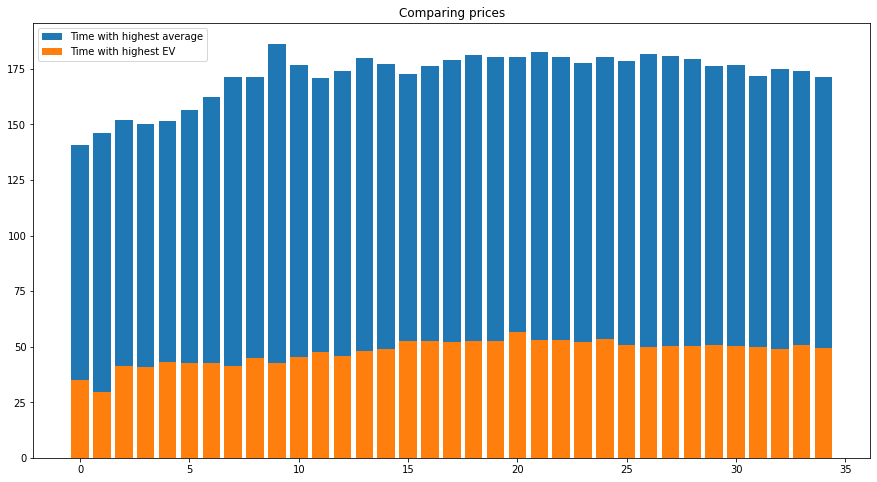

In [ ]:

x = list(range(0, len(pricePerRoundTeamHighestAverage)-1))

xEv = list(range(0, len(pricePerRoundTeamEV)))
plt.figure(figsize=(15,8))
plt.title("Comparing prices")
plt.bar(x, pricePerRoundTeamHighestAverage.head(35), label="Time with highest average")
plt.bar(xEv, pricePerRoundTeamEV, label="Time with highest EV")

plt.legend()

In [ ]:
#Obtain averages during the entire Brazilian championship
dados = []
for name in df["Name"].unique():
  price = np.mean(getColumnDataBasedOnThePlayerName(name, df, "Price"))
  score = np.mean(getColumnDataBasedOnThePlayerName(name, df, "Score"))
  ev = np.mean(getColumnDataBasedOnThePlayerName(name, df, "EV"))
  probabilityOfWin = np.mean(getColumnDataBasedOnThePlayerName(name, df, "ProbabilityOfWin"))
  position = df[(df["Name"] == name)]["Position"].to_list()[0]

  data = {"Score": score, "Price": price, "Name": name, "EV": ev, "Position": position, "ProbabilityOfWin": probabilityOfWin}
  dados.append(data)


# What is the best team with 100 cartoletas?

Looking the graphs and the best investment is lateral, mid and goalkeeper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Probability of Win vs EV')

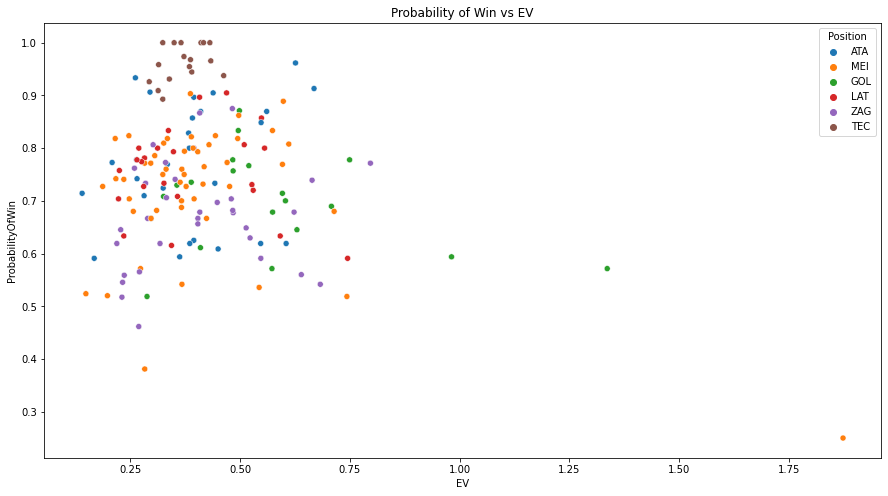

In [ ]:
#create grouping
import seaborn as sns


dataFrameTheBestTeam = pd.DataFrame(dados, columns=["Score", "Price", "Name", "EV", "Position", "ProbabilityOfWin"])

dataFrameTheBestTeam["ScorePerPrice"] = dataFrameTheBestTeam["Score"]/dataFrameTheBestTeam["Price"]

plt.figure(figsize=(15,8))
sns.scatterplot('EV', 'ProbabilityOfWin', data=dataFrameTheBestTeam, hue="Position").set_title("Probability of Win vs EV")




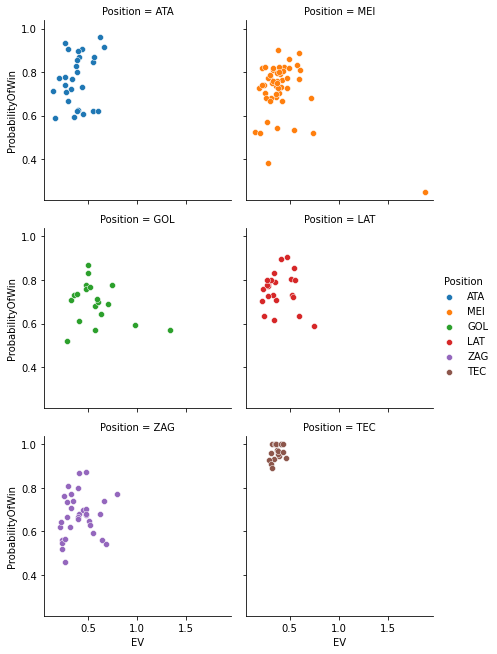

In [ ]:
g = sns.FacetGrid(dataFrameTheBestTeam, col="Position", hue="Position", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="EV", y="ProbabilityOfWin")
g.set_axis_labels("EV", "ProbabilityOfWin")

g.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score player vs EV')

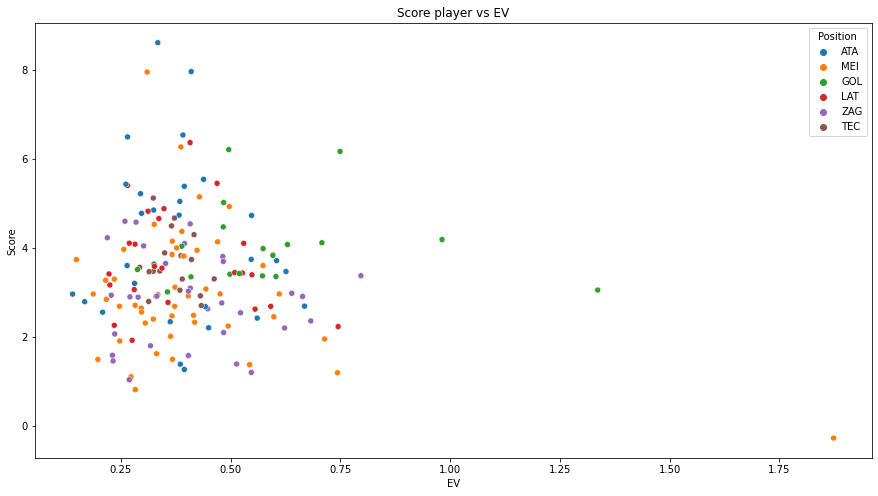

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot('EV', 'Score', data=dataFrameTheBestTeam, hue="Position").set_title("Score player vs EV")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Score player vs EV')

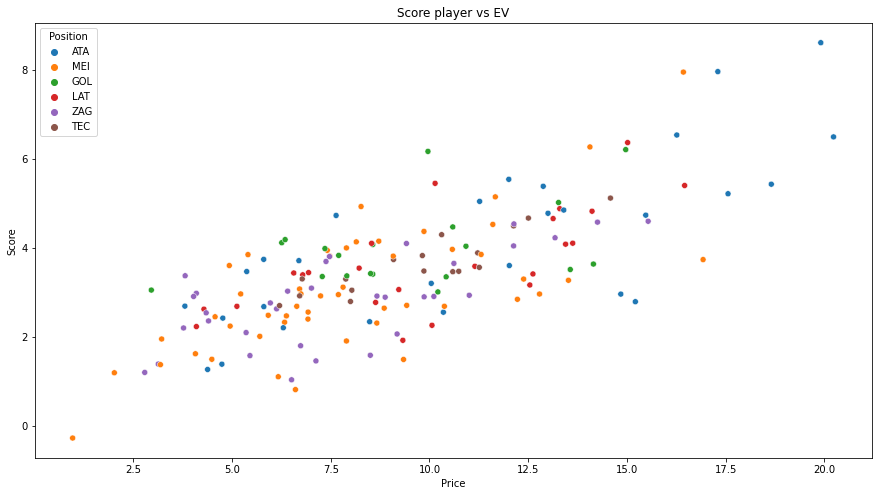

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot('Price', 'Score', data=dataFrameTheBestTeam, hue="Position").set_title("Score player vs EV")

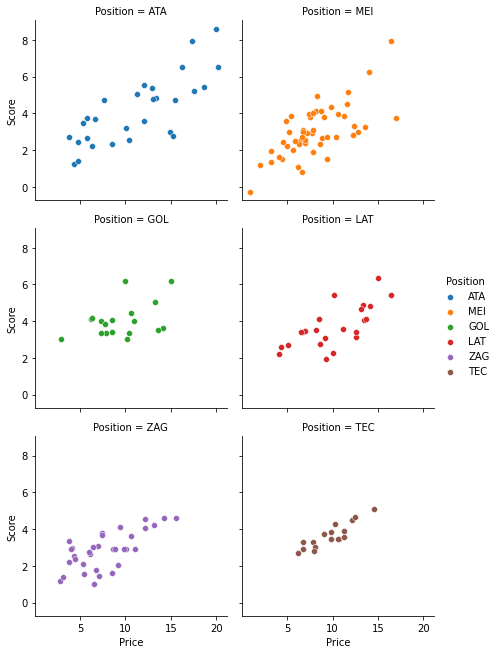

In [ ]:
g = sns.FacetGrid(dataFrameTheBestTeam, col="Position", hue="Position", col_wrap=2)
g.map_dataframe(sns.scatterplot, x="Price", y="Score")
g.set_axis_labels("Price", "Score")
g.add_legend()

In [ ]:
dataFrameTheBestTeam[(dataFrameTheBestTeam["Price"] > 13) & (dataFrameTheBestTeam["Price"] < 16)].groupby(by="Position").max()

,Score,Price,Name,EV,ProbabilityOfWin,ScorePerPrice
Position,,,,,,
ATA,4.851724,15.475714,Rony (ATA),0.382414,0.828571,0.367605
GOL,6.211111,14.968889,Weverton (GOL),0.495535,0.833333,0.414935
LAT,6.368966,15.017241,Reinaldo (LAT),0.407375,0.896552,0.424110
MEI,6.270968,14.062581,Willian Arão (MEI),0.386482,0.903226,0.445933
TEC,5.121071,14.582143,Jorge Jesus (TEC),0.323545,0.892857,0.351188
ZAG,4.600000,15.536667,Víctor Cuesta (ZAG),0.284309,0.761905,0.321313


In [ ]:
dataFrameTheBestTeam

dataList = []
for combination in range(0, 1000000):
  playersName = []

  attacker = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="ATA")].sample(n=2)
  attacker0 = attacker.iloc[0]
  attacker1 = attacker.iloc[1]

  manager = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="TEC")].sample(n=1).iloc[0]

  goalkeeper = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="GOL")].sample(n=1).iloc[0]

  mid = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="MEI")].sample(n=4)
  mid0 = mid.iloc[0]
  mid1 = mid.iloc[1]
  mid2 = mid.iloc[2]
  mid3 = mid.iloc[3]

  defenser = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="ZAG")].sample(n=2)
  defenser0 = defenser.iloc[0]
  defenser1 = defenser.iloc[1]

  lateral = dataFrameTheBestTeam[(dataFrameTheBestTeam['Position']=="LAT")].sample(n=2)
  lateral0 = lateral.iloc[0]
  lateral1 = lateral.iloc[1]

 
  teamPrice = attacker["Price"].sum() + manager["Price"].sum() + goalkeeper["Price"].sum() + mid["Price"].sum() + defenser["Price"].sum() + lateral["Price"].sum()

  if teamPrice >= 95 and teamPrice <= 100:
    playersName.extend([attacker0["Name"], attacker1["Name"], manager["Name"], goalkeeper["Name"], mid0["Name"], mid1["Name"], mid2["Name"], mid3["Name"], defenser0["Name"], defenser1["Name"], lateral0["Name"], lateral1["Name"]])
    teamScore = attacker["Score"].sum() + manager["Score"].sum() + goalkeeper["Score"].sum() + mid["Score"].sum() + defenser["Score"].sum() + lateral["Score"].sum()
    print("COMBINATION: ", combination, " TEAM SCORE: ",  teamScore, " PRICE: ", teamPrice)
    data = {"TeamPrice": teamPrice, "TeamScore": teamScore, "Players": playersName}
    dataList.append(data)
  

dataList

A saída de streaming foi truncada nas últimas 5000 linhas.
COMBINATION:  952106  TEAM SCORE:  40.938171194397  PRICE:  97.51758383587739
COMBINATION:  952119  TEAM SCORE:  36.11677048709981  PRICE:  95.59226207542807
COMBINATION:  952124  TEAM SCORE:  35.1763759150555  PRICE:  96.16395957966867
COMBINATION:  952129  TEAM SCORE:  43.33945633264099  PRICE:  97.37456434166046
COMBINATION:  952148  TEAM SCORE:  42.47198341800457  PRICE:  95.54469145377519
COMBINATION:  952149  TEAM SCORE:  36.46376078482408  PRICE:  97.43372230468836
COMBINATION:  952159  TEAM SCORE:  44.39439158953281  PRICE:  96.87382000947454
COMBINATION:  952167  TEAM SCORE:  40.53933963676705  PRICE:  98.14570109016094
COMBINATION:  952169  TEAM SCORE:  35.3402071071954  PRICE:  95.65128323178077
COMBINATION:  952181  TEAM SCORE:  37.62122768505834  PRICE:  95.57365287201175
COMBINATION:  952188  TEAM SCORE:  44.71432897858024  PRICE:  99.21922071484886
COMBINATION:  952190  TEAM SCORE:  35.857648638727355  PRICE:  97

[{'Players': ['Artur (ATA)',
   'David (ATA)',
   'Fábio Carille (TEC)',
   'Vladimir (GOL)',
   'Richard Franco (MEI)',
   'Edenílson (MEI)',
   'Diego Pituca (MEI)',
   'Carlos Sánchez (MEI)',
   'Juninho (ZAG)',
   'Betão (ZAG)',
   'Jorge (LAT)',
   'João Lucas (LAT)'],
  'TeamPrice': 97.61167562412766,
  'TeamScore': 38.516349193899245},
 {'Players': ['Michael (ATA)',
   'Rossi (ATA)',
   'Argel Fucks (TEC)',
   'Gatito Fernández (GOL)',
   'Diego Pituca (MEI)',
   'Nikão (MEI)',
   'Fabinho (MEI)',
   'Camilo (MEI)',
   'Gustavo Henrique (ZAG)',
   'Pablo Marí (ZAG)',
   'Marcos Rocha (LAT)',
   'João Lucas (LAT)'],
  'TeamPrice': 99.44084527955489,
  'TeamScore': 36.957018569618725},
 {'Players': ['Clayson (ATA)',
   'Osvaldo (ATA)',
   'Rodrigo Santana (TEC)',
   'Cássio (GOL)',
   'Carlos Sánchez (MEI)',
   'Tchê Tchê (MEI)',
   'Thiago Neves (MEI)',
   'Felipe Melo (MEI)',
   'Alan Costa (ZAG)',
   'Betão (ZAG)',
   'Carlinhos (LAT)',
   'Moisés (LAT)'],
  'TeamPrice': 97.345

In [ ]:
dataFrameTheBestTeam.shape

(170, 7)

# What is the best position to invest?

In [ ]:
dataFrame100Cartoletas = pd.DataFrame(dataList, columns=["TeamPrice", "TeamScore", "Players"])

print("SHAPE: ", dataFrame100Cartoletas.shape)

print("MAX SCORE: ", dataFrame100Cartoletas["TeamScore"].max(), " AVERAGE SCORE: ", dataFrame100Cartoletas["TeamScore"].mean())
print("PLAYERS: ", dataFrame100Cartoletas.max()["Players"], " STANDARD DEVIATION: ", dataFrame100Cartoletas["TeamScore"].std())



SHAPE:  (103527, 3)
MAX SCORE:  51.01552798000212  AVERAGE SCORE:  38.19893640110116
PLAYERS:  ['Yony González (ATA)', 'Wellington Paulista (ATA)', 'Vanderlei Luxemburgo (TEC)', 'Santos (GOL)', 'Diego Pituca (MEI)', 'Jonatan Gomez (MEI)', 'Willian Arão (MEI)', 'João Paulo (MEI)', 'Arboleda (ZAG)', 'Fábio Sanches (ZAG)', 'Danilo Avelar (LAT)', 'Rafinha (LAT)']  STANDARD DEVIATION:  2.9367247400599403


# Evaluation

The EV team for this case, although more profitable in the long run, does not pay, because we want to score more even by risking more and losing cartouches. We also saw that putting together a team with a very high average is out of scope because it requires great value for cartoletas. We also found that scaling lateral, defenders and mids is better than investing in expensive attackers.
A very important note is that these algorithms do not have a team captain whose score is always 2x.
